In [2]:
from pytictoc import TicToc
t = TicToc() #create instance of class

from src.Prep import *
from src.Model import *
import warnings
warnings.filterwarnings('ignore')

%load_ext autoreload
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
%autoreload

------------------------------------PREP------------------------------------
 1 of 11 |    Reading in data 
         |    Filtering to 4 features:
         |       Date, System Size, Total Cost, Customer Segment 
         |    Changing -9999 values to null
 2 of 11 |    Cleaning up column names
 3 of 11 |    Refining to only RES Customer Segment
 4 of 11 |    Sorting values by installation_date
         |    Assigning installation_date as index
 5 of 11 |    Replacing all null values with median values from same year
 6 of 11 |    Adusting prices for inflation
 7 of 11 |    Creating target variable: cost_per_watt
 8 of 11 |    Resampling data into weekly medians
         |    Cropping dataframe to keep only continuous non-null data
 9 of 11 |    Testing for stationarity
         |       ADF P-value: 0.9588 
         |       Time Series is not stationary.   
         |       Fail to reject ADF H0
10 of 11 |    Creating differenced data to achieve stationarity
11 of 11 |    Testing for s

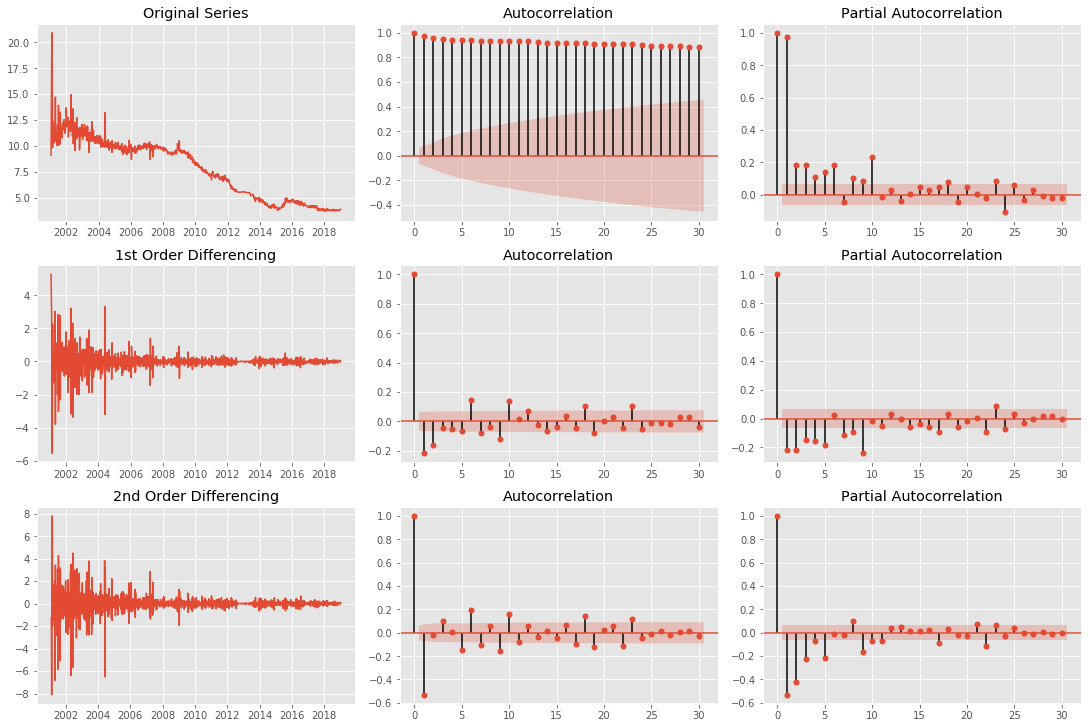

In [3]:
df = Prep().compile()

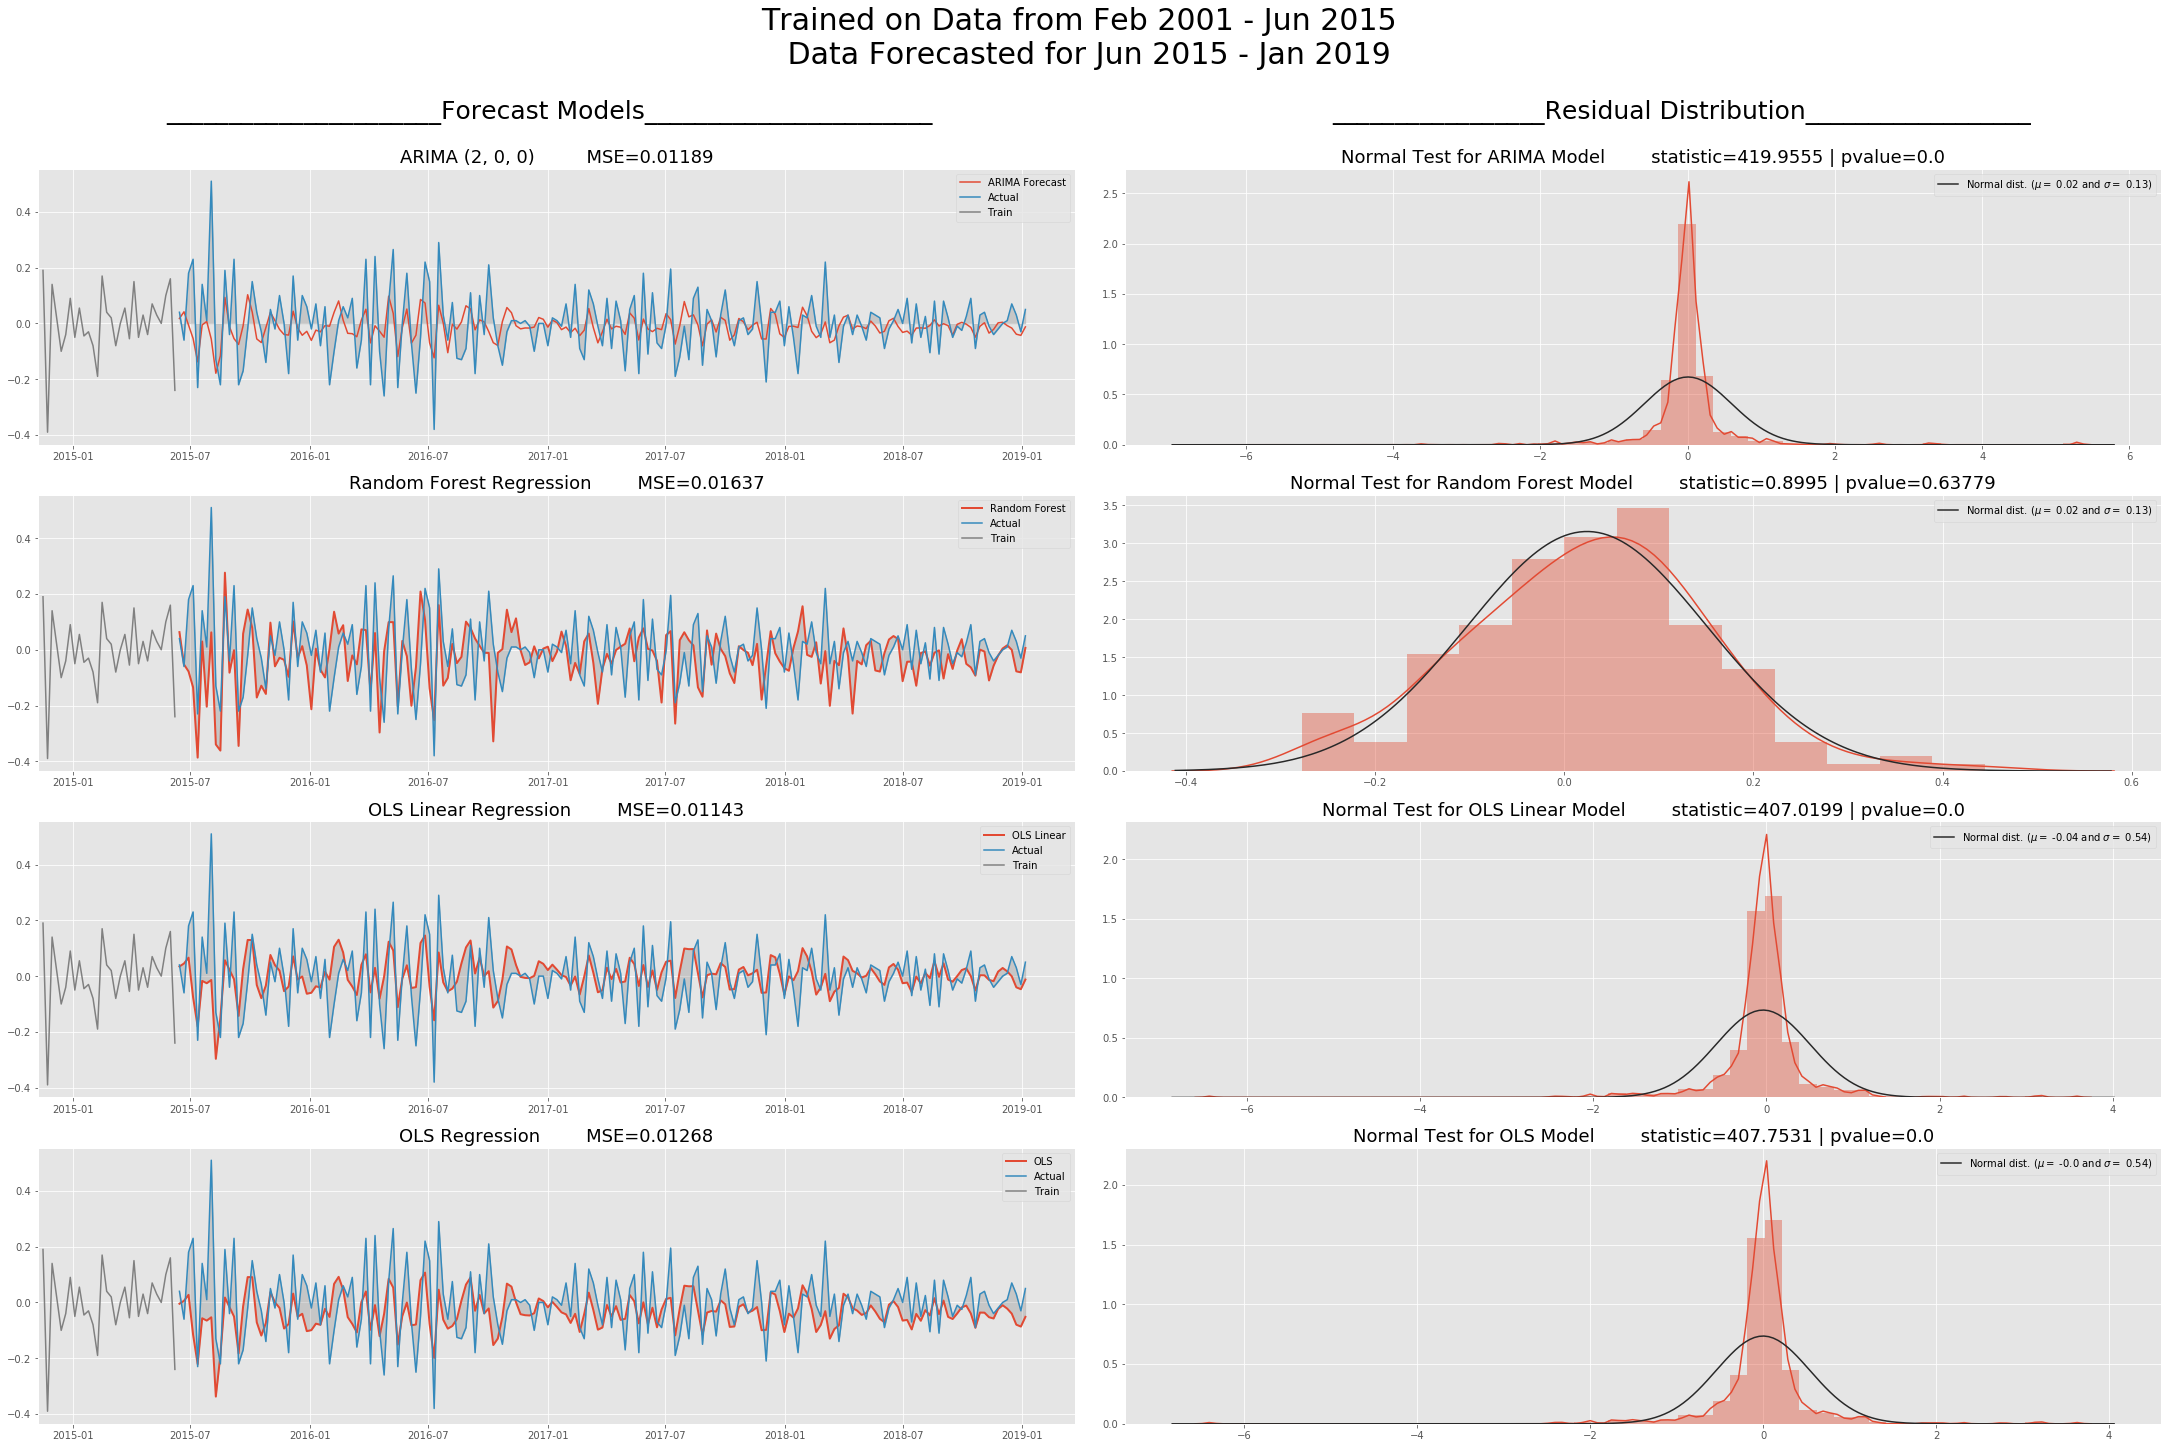

In [4]:
#predetermined order
Models().show_model(df)

Please input each parameter


p: 0
d: 0
q: 0


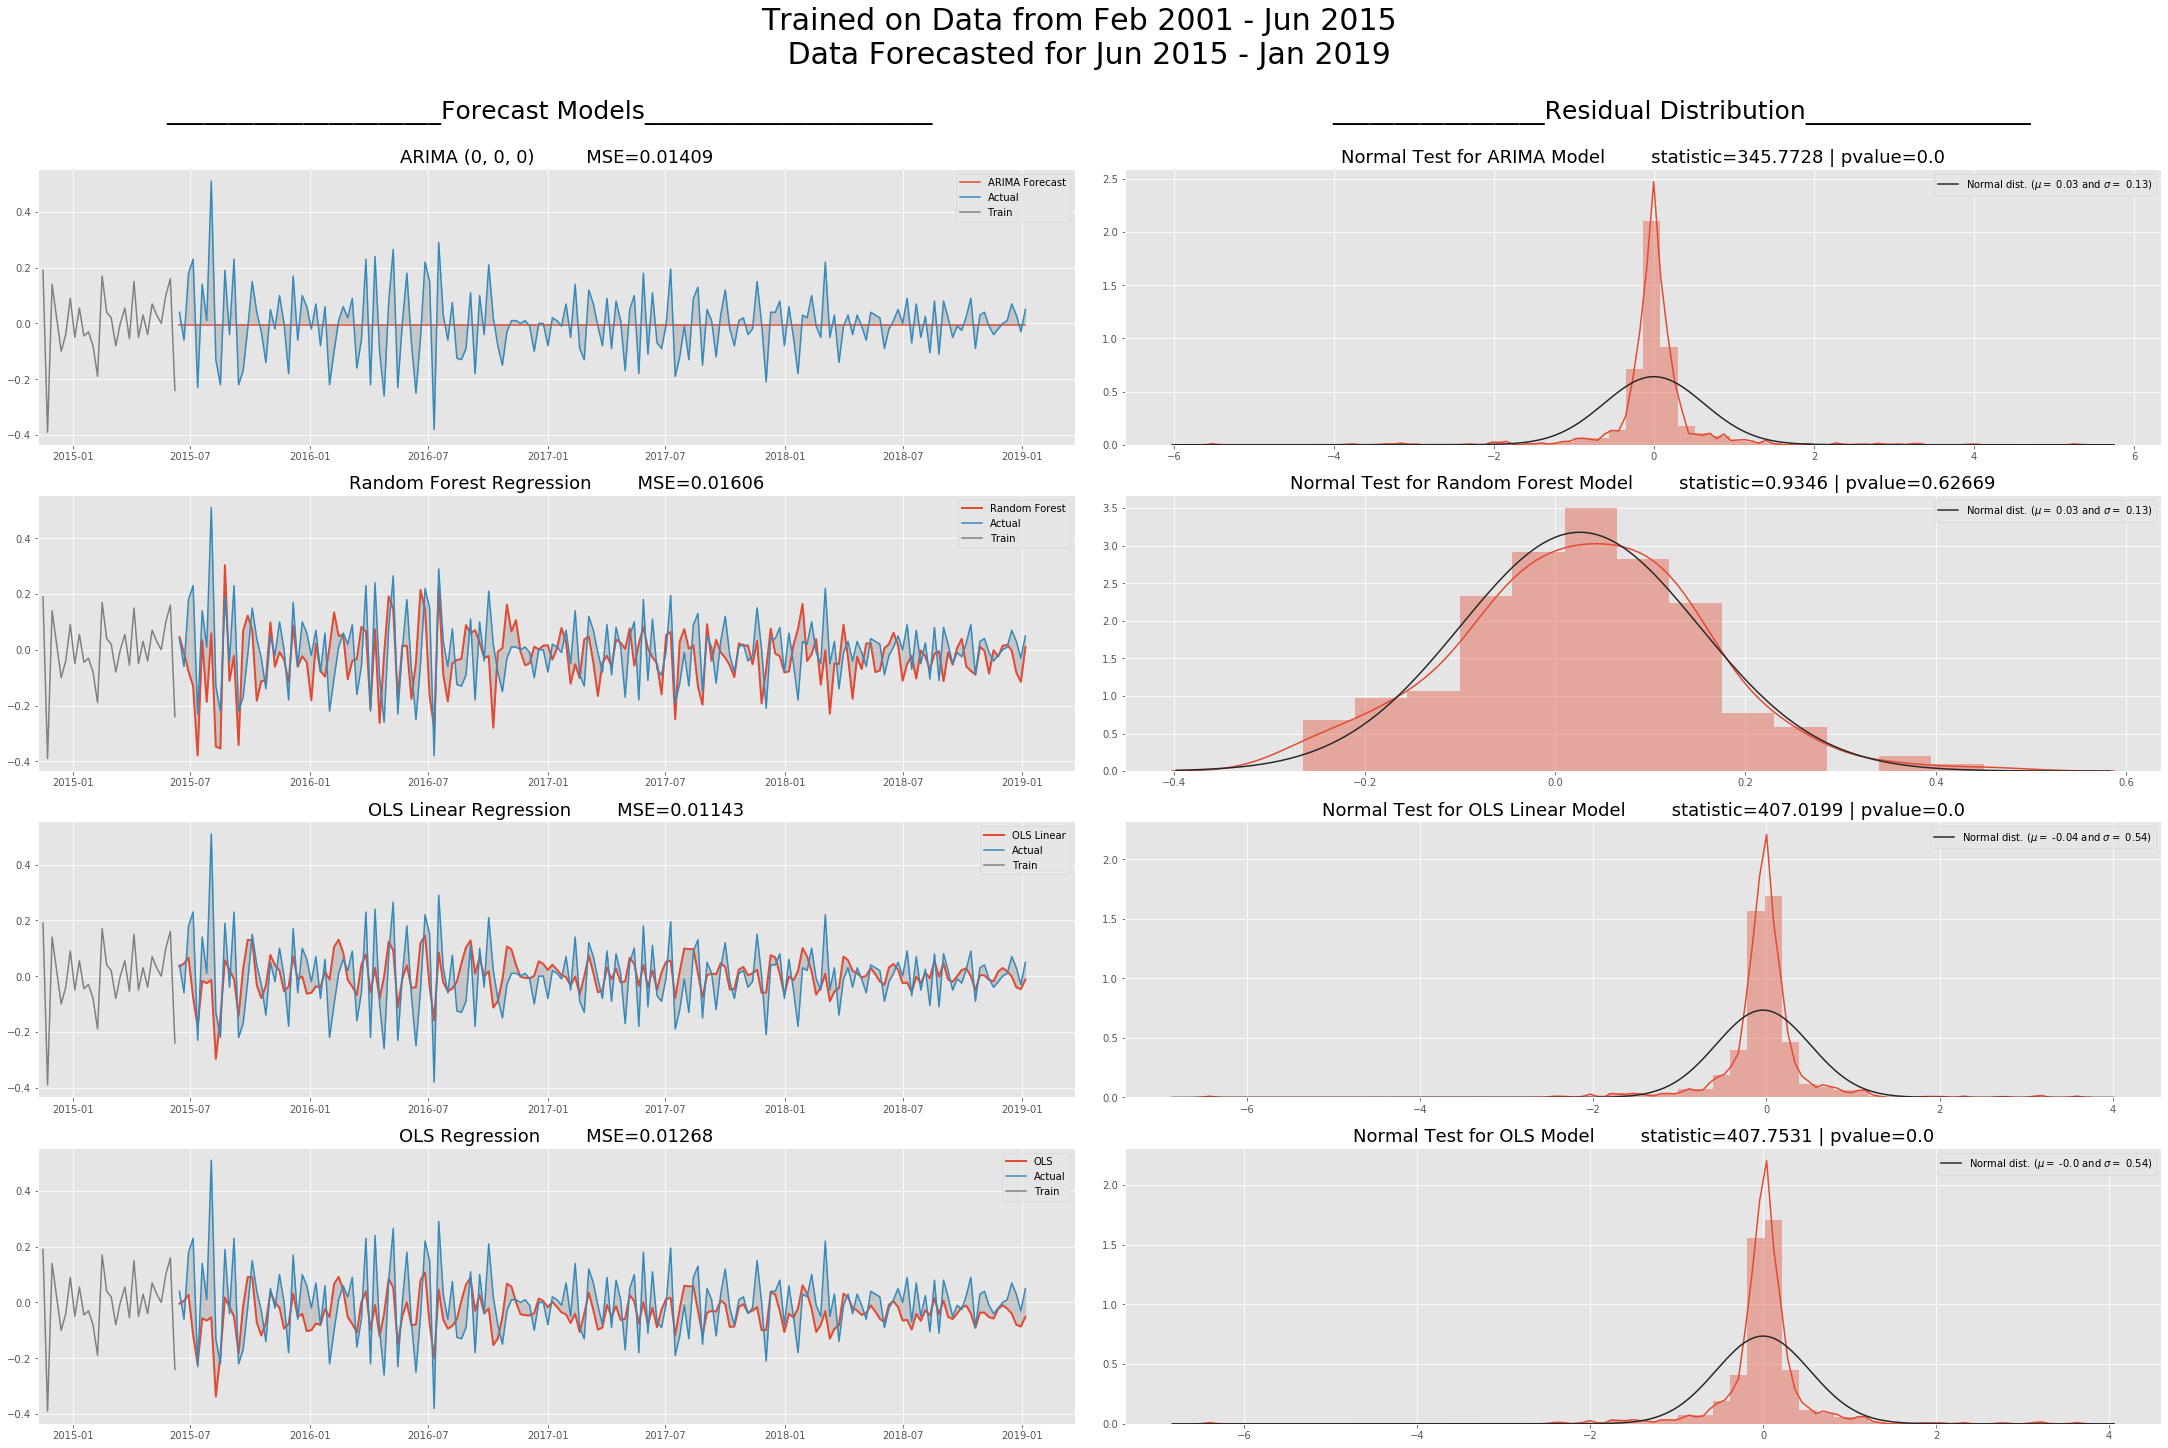

In [6]:
Models(order_method='select').show_model(df)

Please input each parameter


p: 3
d: 0
q: 1


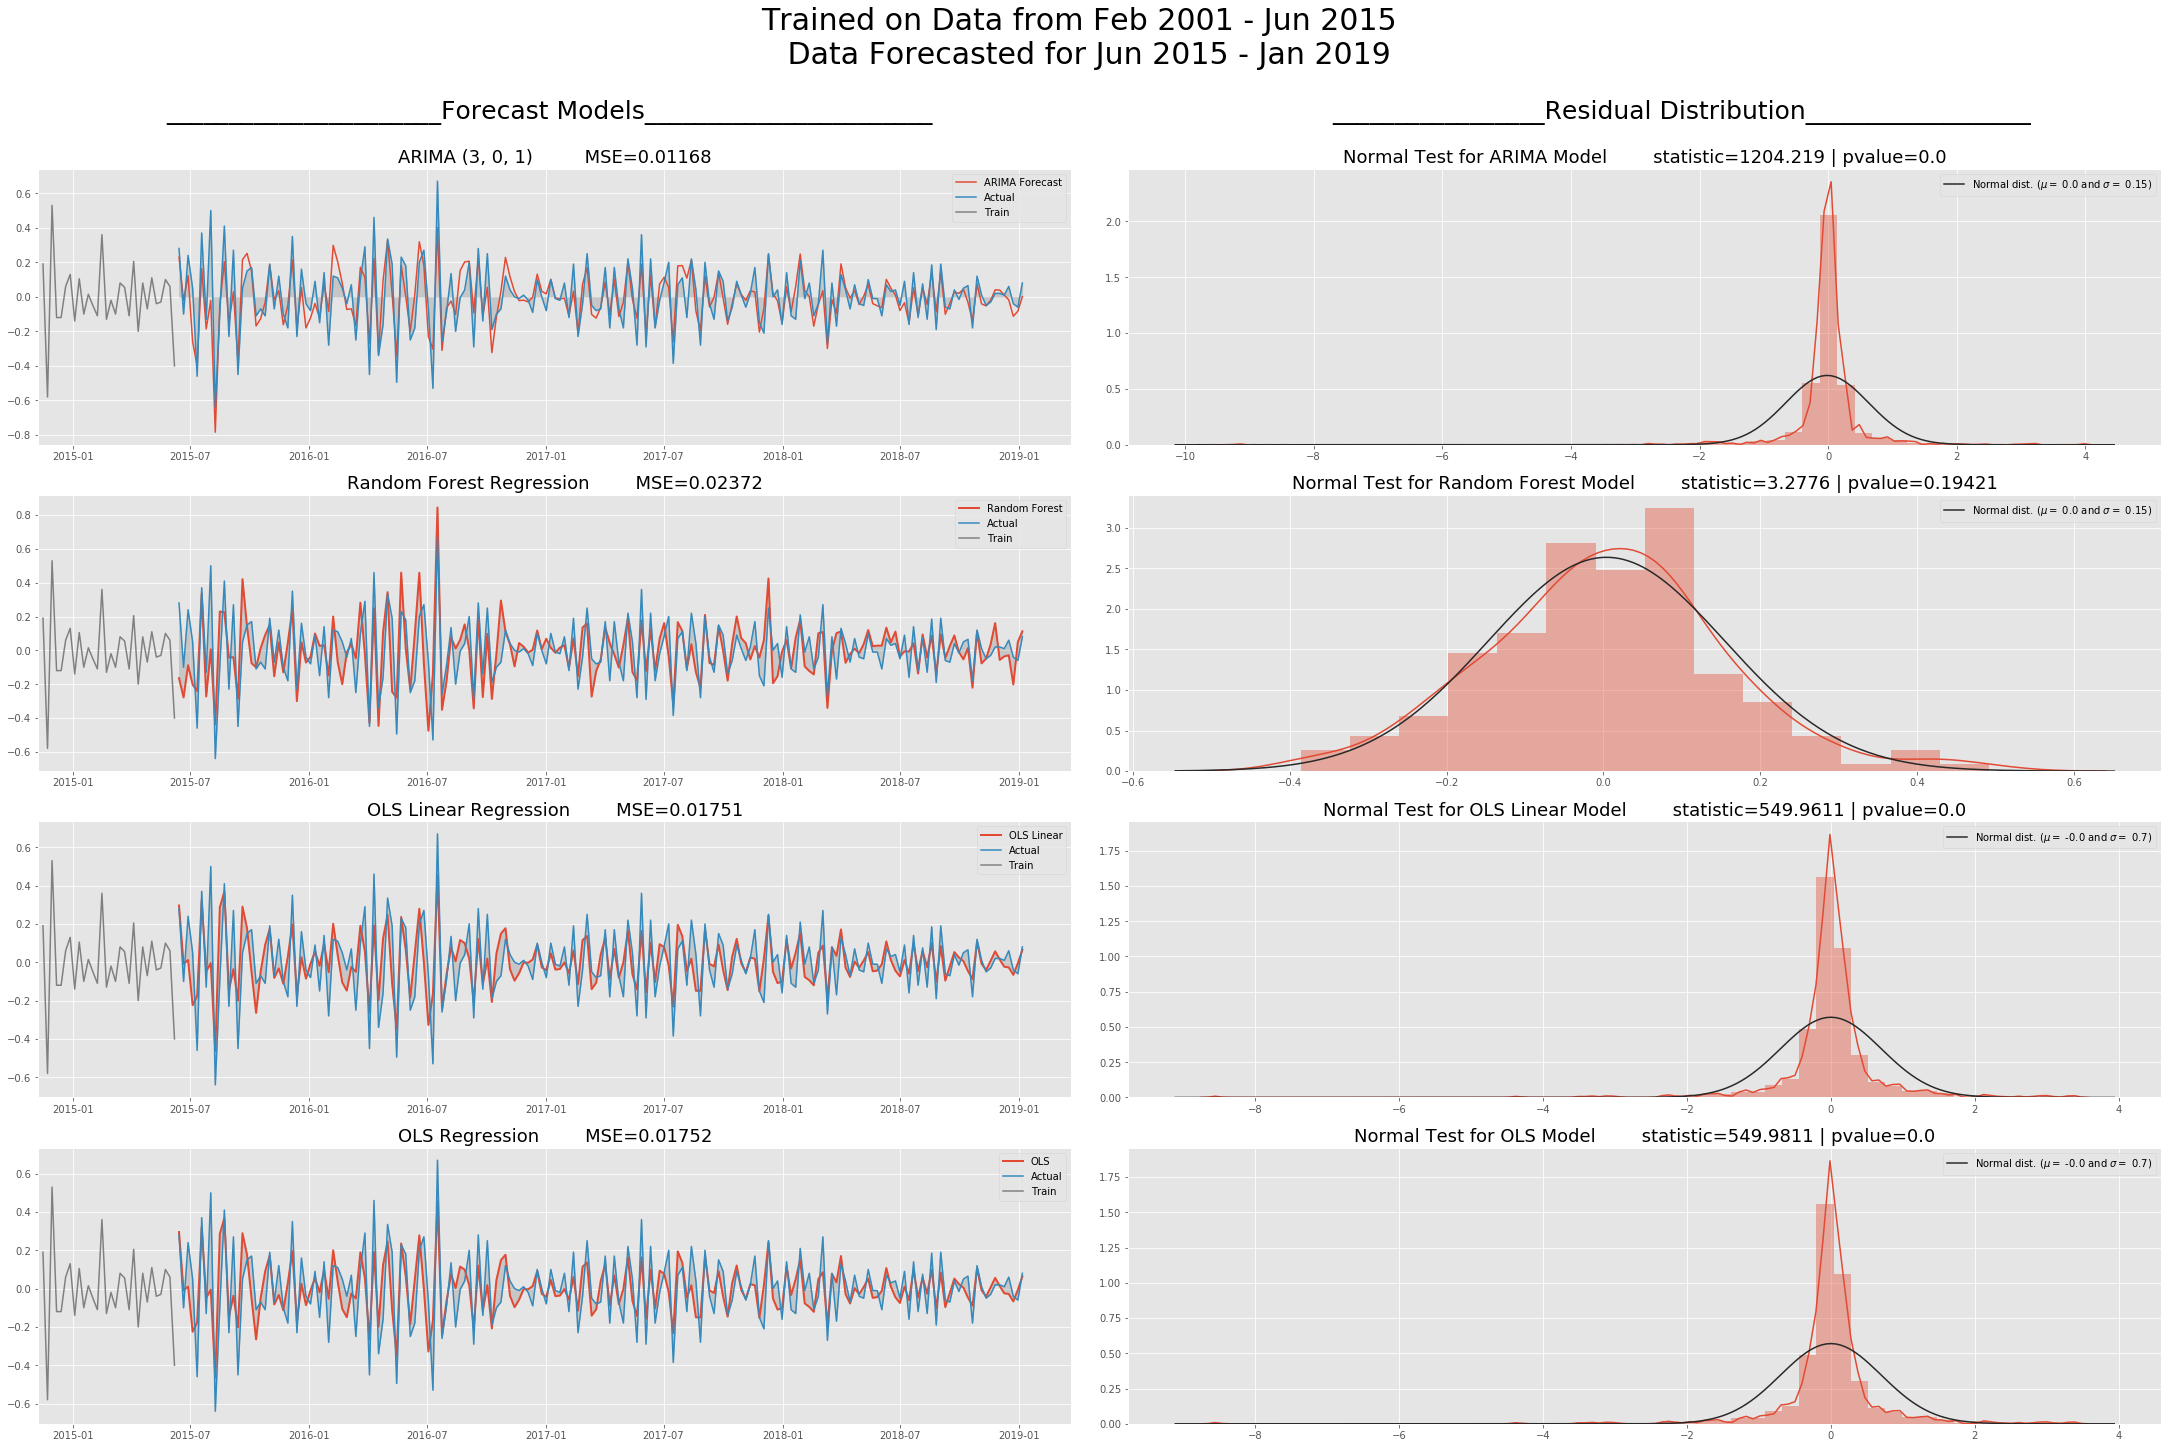

In [7]:
#Second order differenced 
#select order
Models(order_method='select').show_model(df.diff().dropna())

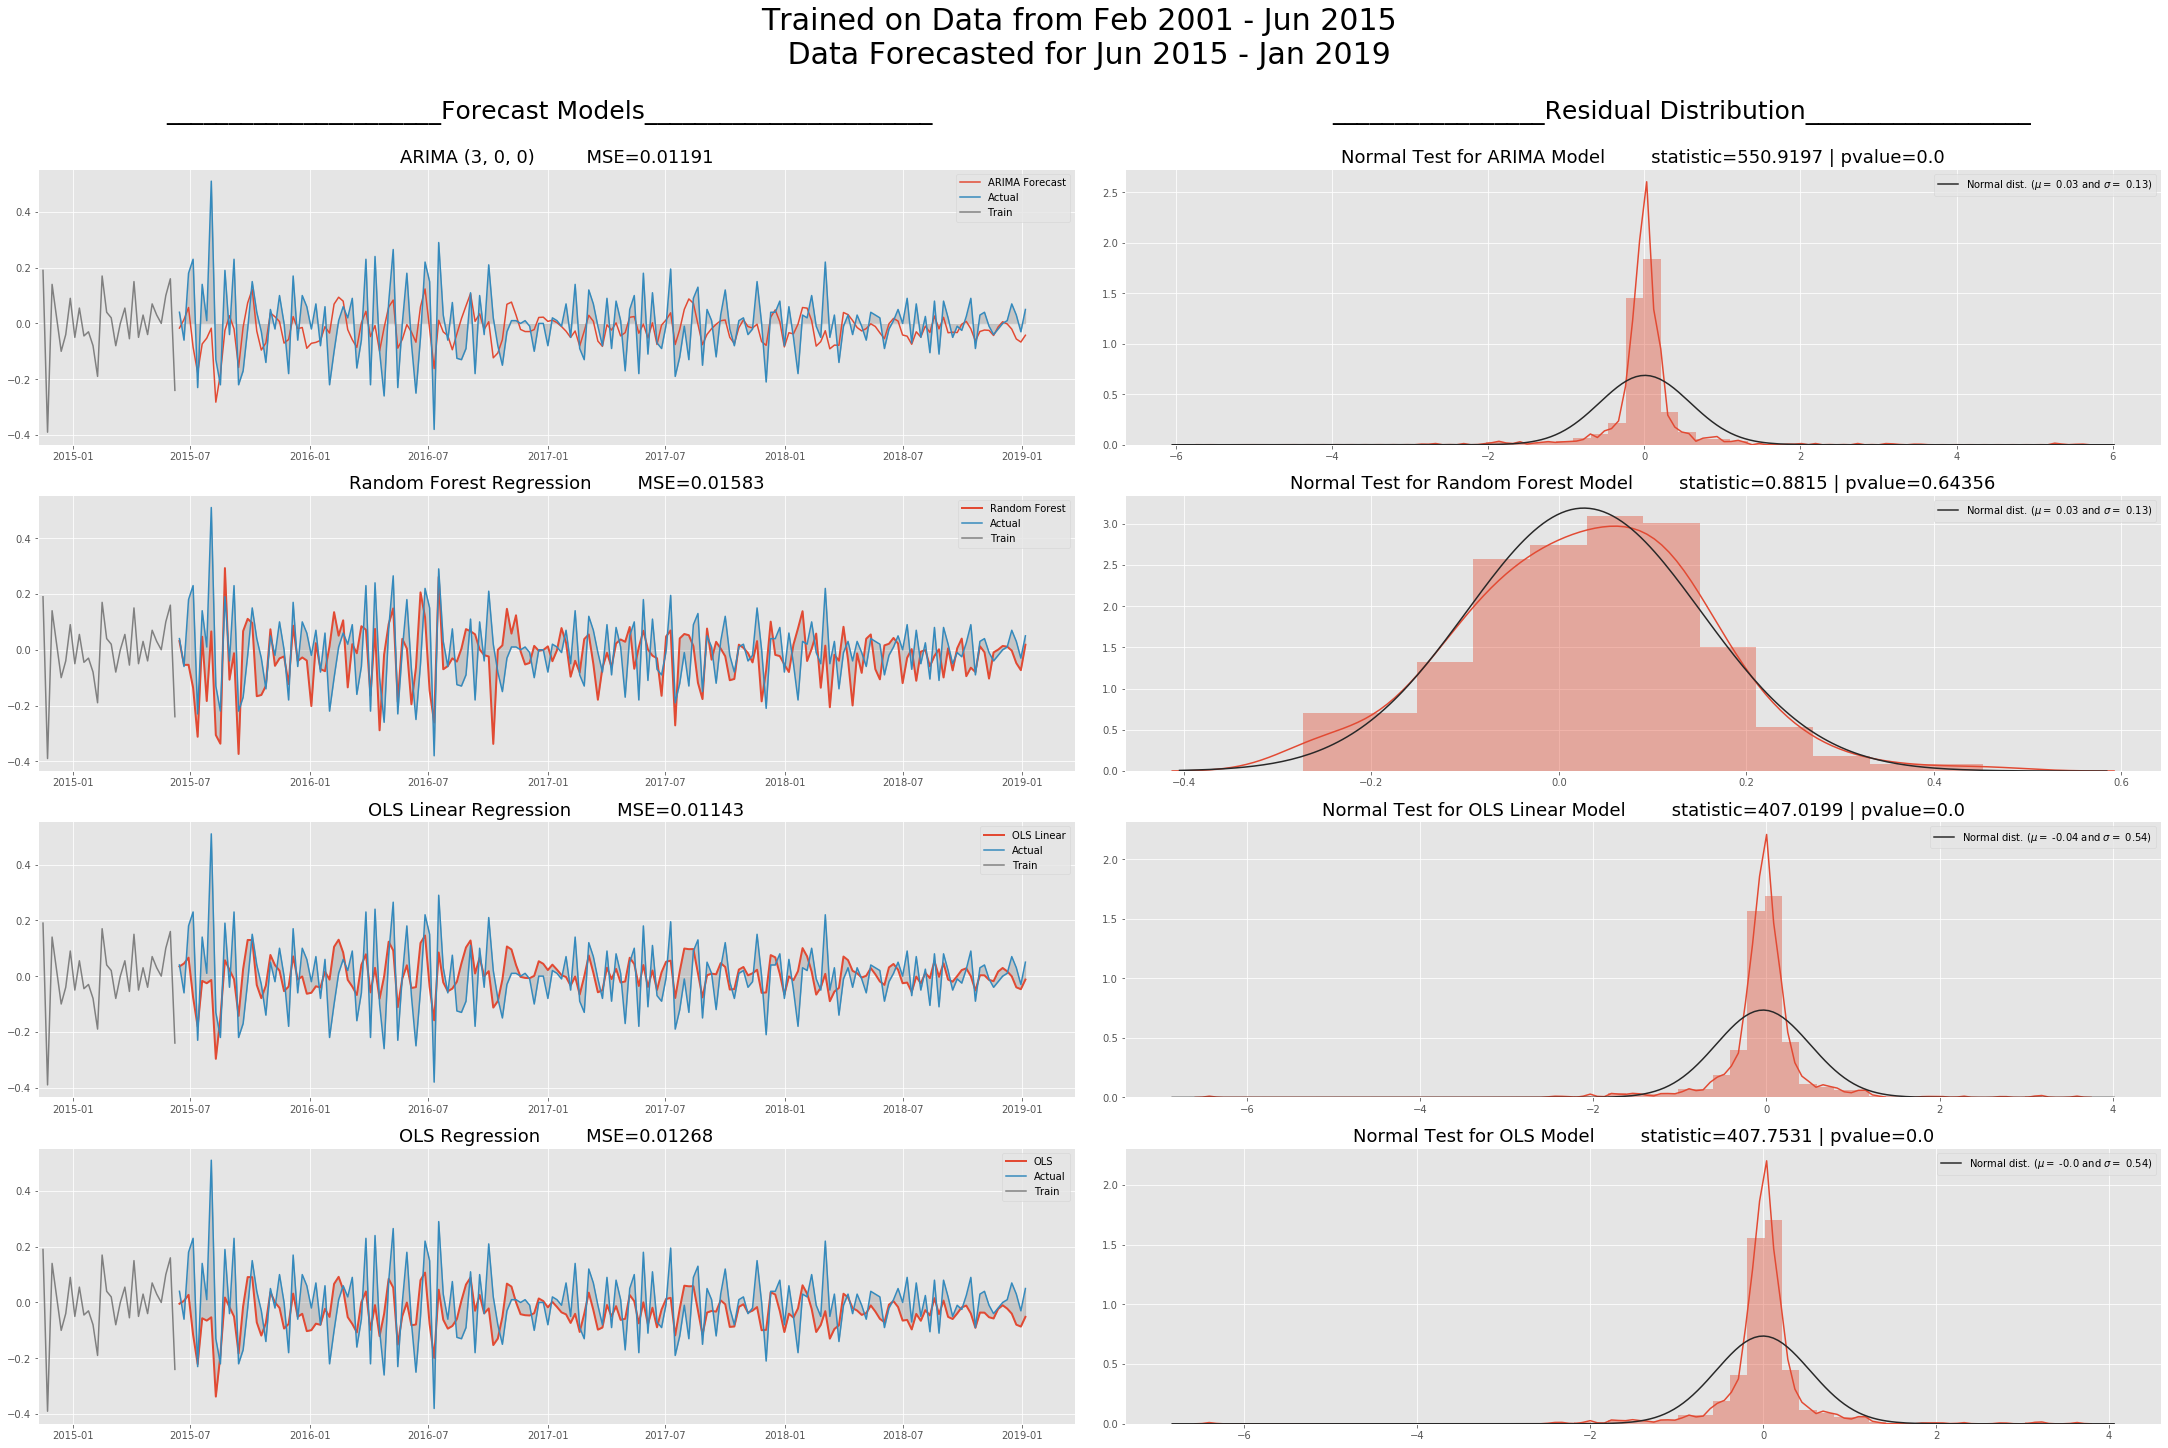

In [8]:
Models(order_method='auto').show_model(df)

In [ ]:
#Manual Order Method confirmed 
t.tic()
Models(order_method='manual').show_model(df)
t.toc()

CAUTION: MANUAL IS VERY COMPUTATIONALLY EXPENSIVE (~20 minutes) 
Please enter "ok" to proceed


 ok


Please hold
